In [11]:
import numpy as np

data=np.load('C:\\Users\\Acer\\OneDrive\\Desktop\\dataset\\data.npy')
target=np.load('C:\\Users\\Acer\\OneDrive\\Desktop\\dataset\\target.npy')



In [12]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [14]:
checkpoint = ModelCheckpoint('C:\\Users\\Acer\\OneDrive\\Desktop\\dataset\\model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
86/86 [==============================] - 67s 769ms/step - loss: 0.7281 - accuracy: 0.5940 - val_loss: 0.5898 - val_accuracy: 0.6720
INFO:tensorflow:Assets written to: C:\Users\Acer\OneDrive\Desktop\dataset\model-001.model\assets
Epoch 2/20
86/86 [==============================] - 67s 779ms/step - loss: 0.5057 - accuracy: 0.7537 - val_loss: 0.4010 - val_accuracy: 0.8215
INFO:tensorflow:Assets written to: C:\Users\Acer\OneDrive\Desktop\dataset\model-002.model\assets
Epoch 3/20
86/86 [==============================] - 70s 820ms/step - loss: 0.3579 - accuracy: 0.8452 - val_loss: 0.3892 - val_accuracy: 0.8229
INFO:tensorflow:Assets written to: C:\Users\Acer\OneDrive\Desktop\dataset\model-003.model\assets
Epoch 4/20
86/86 [==============================] - 70s 811ms/step - loss: 0.2972 - accuracy: 0.8699 - val_loss: 0.3038 - val_accuracy: 0.8607
INFO:tensorflow:Assets written to: C:\Users\Acer\OneDrive\Desktop\dataset\model-004.model\assets
Epoch 5/20
86/86 [======================

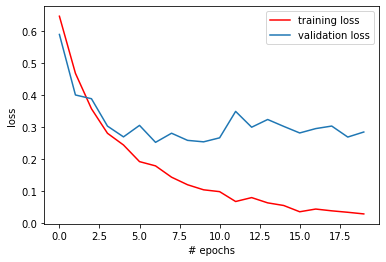

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

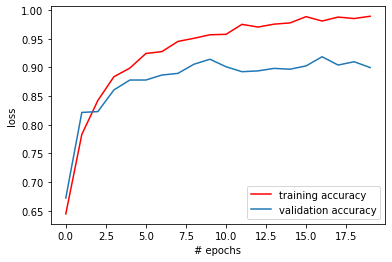

In [16]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print(model.evaluate(test_data,test_target))

12/12 [==============================] - 2s 200ms/step - loss: 0.3116 - accuracy: 0.9191
[0.31161826848983765, 0.9190600514411926]
